# New Knowledge Graph Topology

As an experiment, let's take the refined 11k sequences from Dr. Nair's work and generate a new knowledge graph. This one has been constructed using triples like so:

Sequence &rArr; Token &rArr; Feature

Edges are oriented from the signal source to the strongest active feature, with the token that it was found at serving as an edge type.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.readwrite import json_graph

import os, json

def node_color(x):
    return "purple" if type(x) == str else "red"

with open("data/cisplatin_pos_11k.json") as f:
    data = json.load(f)

G: nx.MultiDiGraph = json_graph.node_link_graph(data, edges="edges")
print(G)

MultiDiGraph with 12982 nodes and 218218 edges


**For example, we can draw one particular features neighborhood graph like so:**

Feature: 7244
Local Graph: MultiDiGraph with 18 nodes and 17 edges


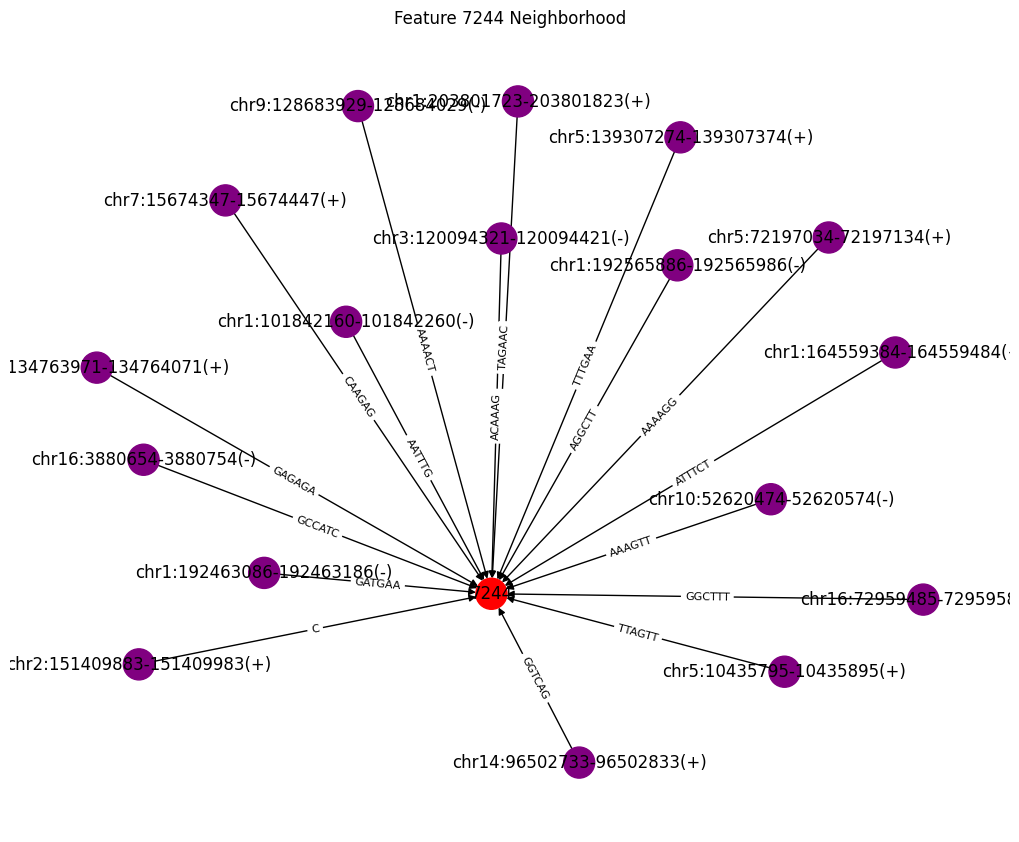

In [6]:
example = [node for node in G.nodes() if type(node) == int][101]
print(f"Feature: {example}")

# Get sequences that connect to this feature (predecessors in directed graph)
neighbors = list(G.predecessors(example))
subgraph_nodes = neighbors + [example]
e_graph = G.subgraph(subgraph_nodes)
print("Local Graph:", e_graph)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(e_graph, seed=42)
node_colors = [node_color(n) for n in e_graph.nodes()]

nx.draw(e_graph, pos, with_labels=True, node_color=node_colors, node_size=500)

# Add token labels on edges
edge_labels = {(u,v): data['token'] for u,v,data in e_graph.edges(data=True) if 'token' in data}
nx.draw_networkx_edge_labels(e_graph, pos, edge_labels, font_size=8)

plt.title(f"Feature {example} Neighborhood")
plt.show()

## On to the Analysis

In [7]:
# density
density = nx.density(G)
print(f"Density: {density}")

# average clustering coefficient
SLG = nx.Graph(G.to_undirected())  # squash multi-edges to convert to simple graph
print(SLG)
avg_clustering_coeff = nx.average_clustering(SLG)
print(f"Average Clustering Coefficient: {avg_clustering_coeff}")

Density: 0.001294913672283387
Graph with 12982 nodes and 126946 edges
Graph with 12982 nodes and 126946 edges
Average Clustering Coefficient: 0.0
Average Clustering Coefficient: 0.0


Top 10 Nodes by Degree Centrality:
Node: 3378, Degree Centrality: 2.963485093598336
Node: 407, Degree Centrality: 2.1701717895385566
Node: 4793, Degree Centrality: 1.264925660580849
Node: 2558, Degree Centrality: 1.1372775595100533
Node: 5746, Degree Centrality: 0.869347507896156
Node: 6445, Degree Centrality: 0.5504968800554657
Node: 7612, Degree Centrality: 0.5224558970803482
Node: 1545, Degree Centrality: 0.4130652492103844
Node: 5234, Degree Centrality: 0.38163469686464835
Node: 4014, Degree Centrality: 0.37316077343810183


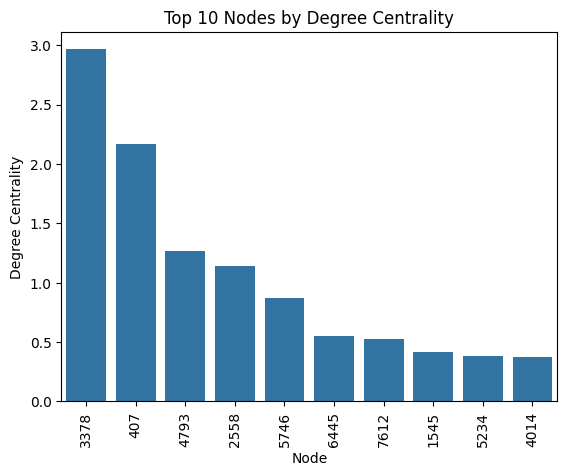

In [8]:
# node-level stats - graph top 10
# degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 10 Nodes by Degree Centrality:")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"Node: {node}, Degree Centrality: {centrality}")

plot = sns.barplot(x=[x[0] for x in sorted_degree_centrality[:10]], y=[y[1] for y in sorted_degree_centrality[:10]], order=[x[0] for x in sorted_degree_centrality[:10]])
plt.title("Top 10 Nodes by Degree Centrality")
plt.xlabel("Node")
plt.xticks(rotation=90)
plt.ylabel("Degree Centrality")
plt.show()

Top 10 Nodes by PageRank:
Node: 3378, PageRank: 0.07539924098210056
Node: 407, PageRank: 0.05559604144154895
Node: 4793, PageRank: 0.032000043108948155
Node: 2558, PageRank: 0.029093344939736497
Node: 5746, PageRank: 0.022199105492865998
Node: 6445, PageRank: 0.01410661757100364
Node: 7612, PageRank: 0.013303553111411324
Node: 1545, PageRank: 0.010485280172065086
Node: 5234, PageRank: 0.00974535700485262
Node: 4014, PageRank: 0.009495149216989806


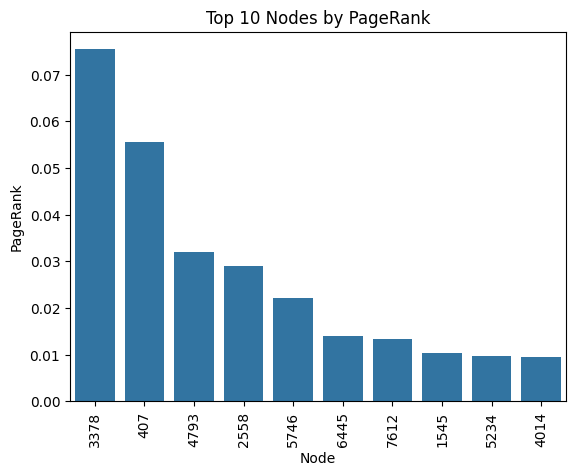

In [9]:
# PageRank
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
print("Top 10 Nodes by PageRank:")
for node, pr in sorted_pagerank[:10]:
    print(f"Node: {node}, PageRank: {pr}")

plot = sns.barplot(x=[x[0] for x in sorted_pagerank[:10]], y=[y[1] for y in sorted_pagerank[:10]], order=[x[0] for x in sorted_pagerank[:10]])
plt.title("Top 10 Nodes by PageRank")
plt.xlabel("Node")
plt.xticks(rotation=90)
plt.ylabel("PageRank")
plt.show() 

Top 10 Nodes by Closeness Centrality:
Node: 5746, Closeness Centrality: 0.8693475078961559
Node: 3378, Closeness Centrality: 0.7912333410369001
Node: 407, Closeness Centrality: 0.5933287111932825
Node: 4793, Closeness Centrality: 0.4536630459902935
Node: 2558, Closeness Centrality: 0.42123102996687467
Node: 1545, Closeness Centrality: 0.3032123873353363
Node: 6445, Closeness Centrality: 0.29859024728449274
Node: 4014, Closeness Centrality: 0.27933133040597796
Node: 5234, Closeness Centrality: 0.251983668438487
Node: 7612, Closeness Centrality: 0.24951852707803712


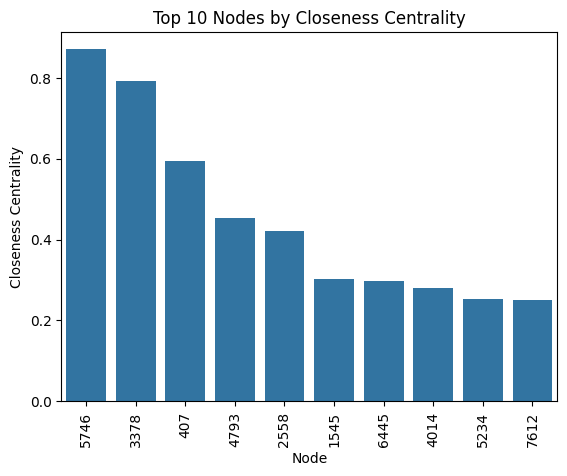

In [10]:
# closeness centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 10 Nodes by Closeness Centrality:")
for node, centrality in sorted_closeness_centrality[:10]:
    print(f"Node: {node}, Closeness Centrality: {centrality}")

plot = sns.barplot(x=[x[0] for x in sorted_closeness_centrality[:10]], y=[y[1] for y in sorted_closeness_centrality[:10]], order=[x[0] for x in sorted_closeness_centrality[:10]])
plt.title("Top 10 Nodes by Closeness Centrality")
plt.xlabel("Node")
plt.xticks(rotation=90)
plt.ylabel("Closeness Centrality")
plt.show()

# Splitting the Graph with Central Feature Nodes Removed

MultiDiGraph with 12632 nodes and 4912 edges
Graph with 3602 nodes and 4687 edges
Graph with 3602 nodes and 4687 edges


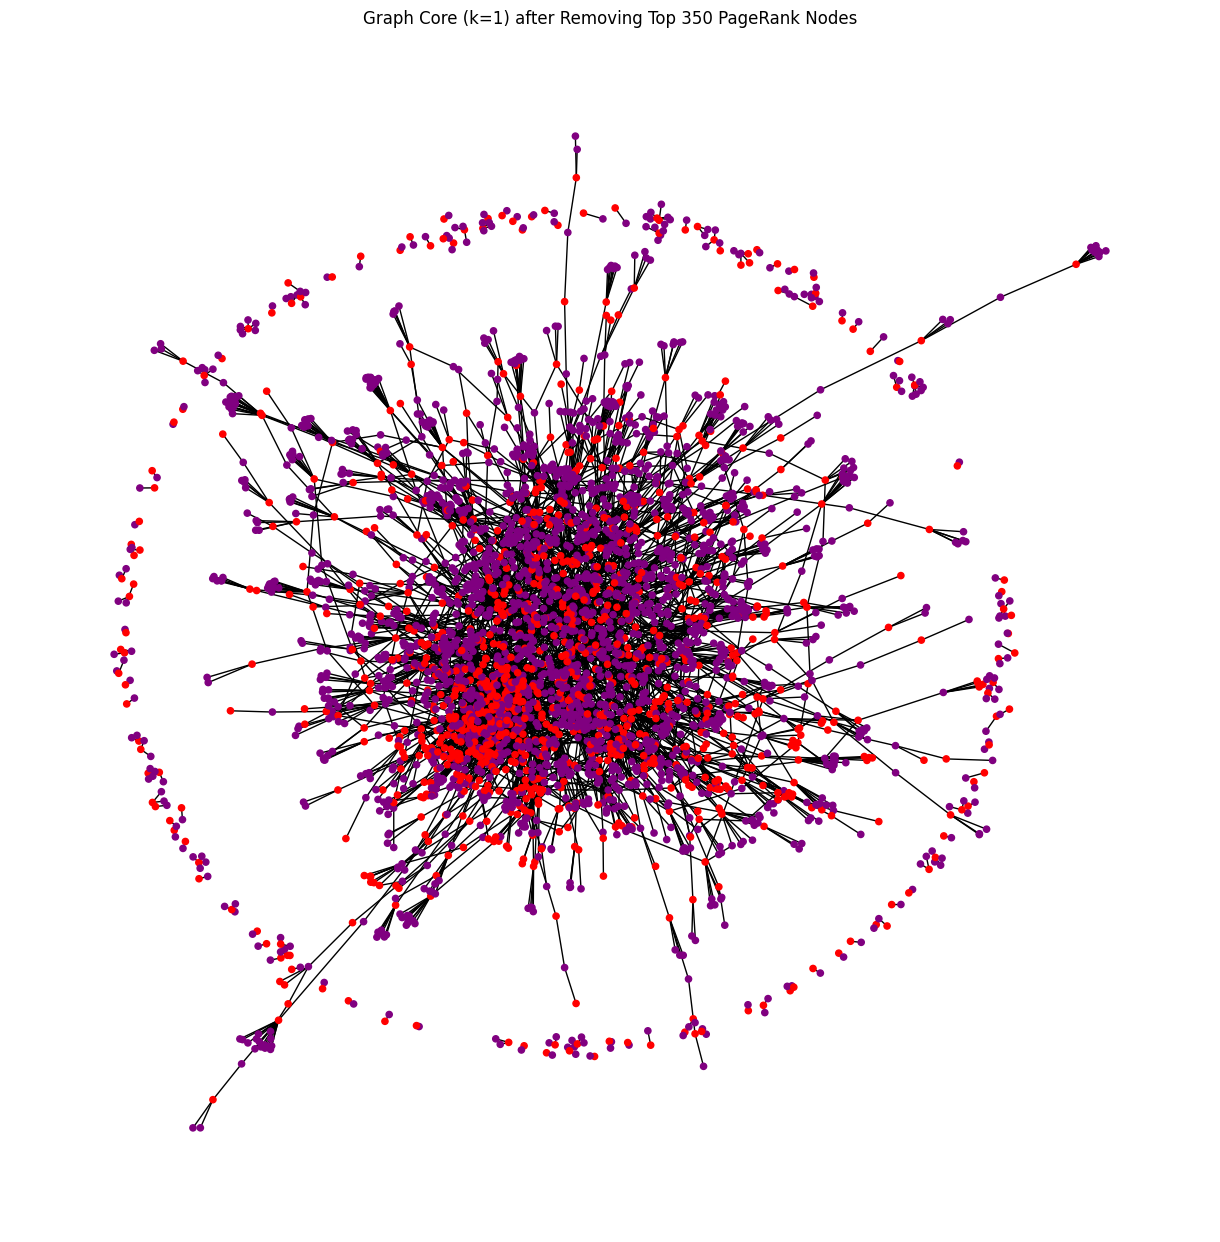

In [11]:
# PageRank
n = 350
k = 1

G_frag = G.copy()
G_frag.remove_nodes_from([x[0] for x in sorted_pagerank[:n]])
print(G_frag)
# trim disconnected nodes
G_frag = nx.Graph(G_frag.to_undirected())  # convert to simple graph
G_frag = nx.k_core(G_frag, k=k)
print(G_frag)

# attempt to visualize the new graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_frag, seed=42)  # positions for all nodes
nx.draw(G_frag, pos, with_labels=False, node_size=20, font_size=8, node_color=[node_color(n) for n in G_frag.nodes()])
plt.title(f"Graph Core (k={k}) after Removing Top {n} PageRank Nodes")
plt.show()

MultiDiGraph with 12632 nodes and 4934 edges
Graph with 3561 nodes and 4662 edges
Graph with 3561 nodes and 4662 edges


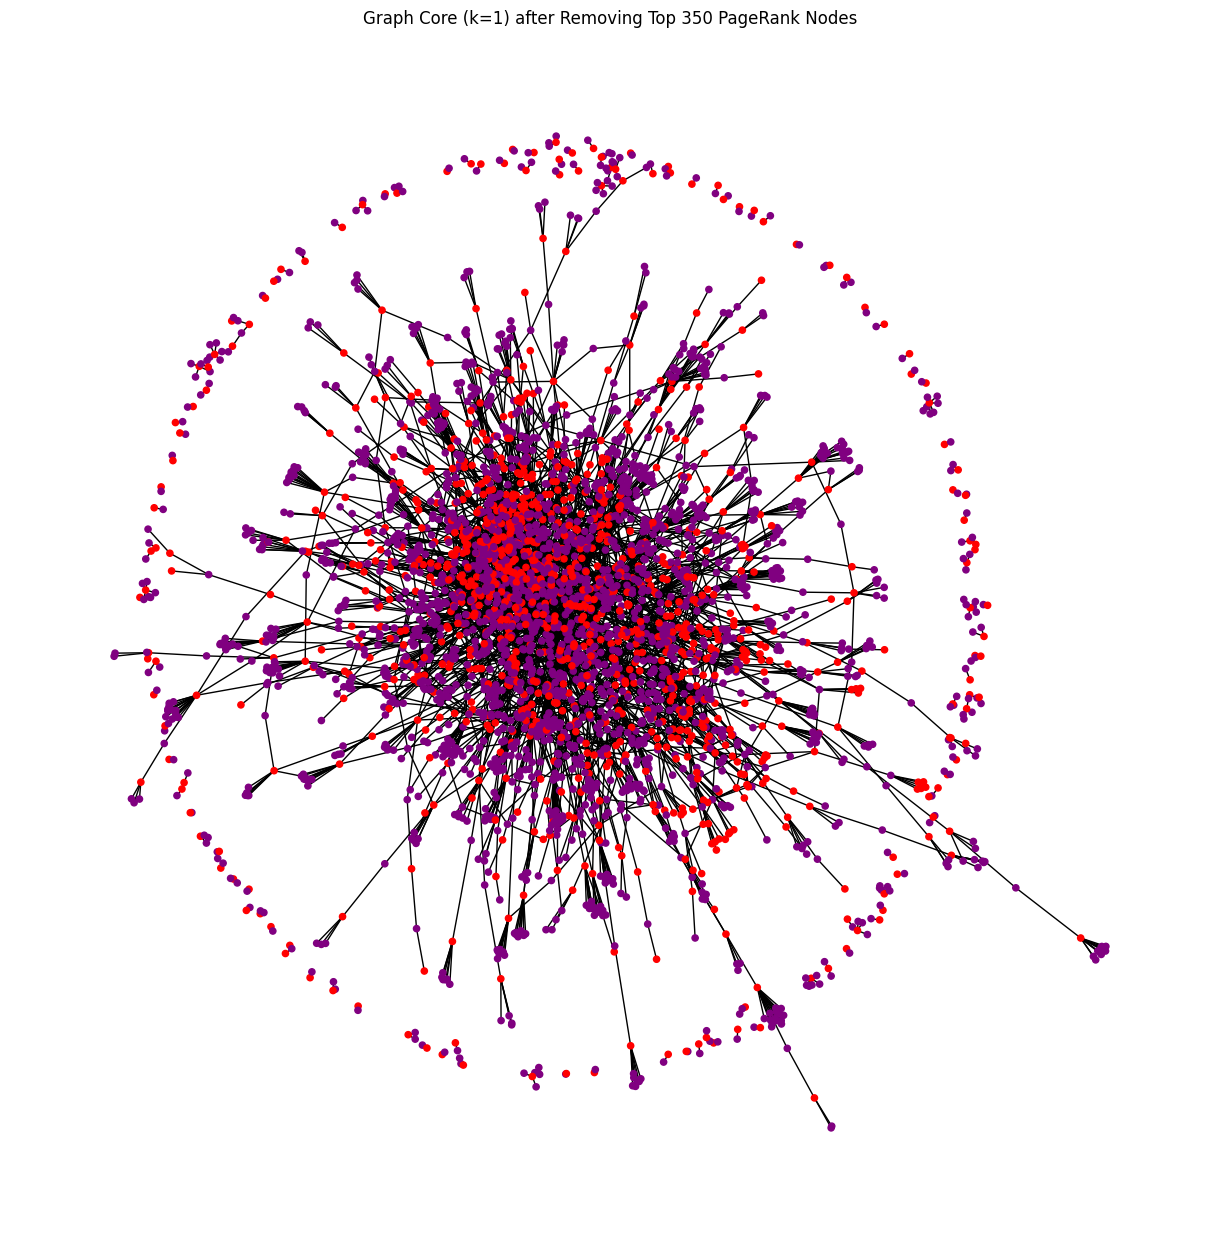

In [12]:
# Closeness Centrality
n = 350
k = 1

G_frag = G.copy()
G_frag.remove_nodes_from([x[0] for x in sorted_closeness_centrality[:n]])
print(G_frag)
# trim disconnected nodes
G_frag = nx.Graph(G_frag.to_undirected())  # convert to simple graph
G_frag = nx.k_core(G_frag, k=k)
print(G_frag)

# attempt to visualize the new graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_frag, seed=42)  # positions for all nodes
nx.draw(G_frag, pos, with_labels=False, node_size=20, font_size=8, node_color=[node_color(n) for n in G_frag.nodes()])
plt.title(f"Graph Core (k={k}) after Removing Top {n} PageRank Nodes")
plt.show()

# Multi-Edge Community

**It's worth noting that ~50% of the edges in the original graph are contributed by multi-layered relationships (i.e. a feature is highly active on the same sequence multiple times). Let's visualize this community:**

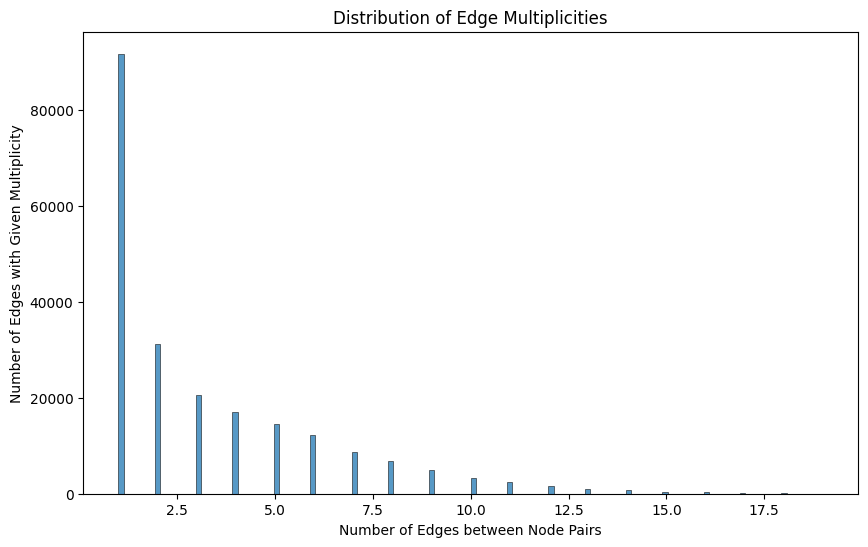

In [13]:
# plot typical edge number distribution
edge_counts = [G.number_of_edges(u, v) for u, v in G.edges()]
plt.figure(figsize=(10, 6))
sns.histplot(edge_counts)
plt.title("Distribution of Edge Multiplicities")
plt.ylabel("Number of Edges with Given Multiplicity")
plt.xlabel("Number of Edges between Node Pairs")
plt.show()

Finding multi-edge connected communities: 100%|██████████| 12982/12982 [00:00<00:00, 534666.68it/s]



Original graph: MultiDiGraph with 12982 nodes and 218218 edges
Multi-edge community subgraph: MultiDiGraph with 905 nodes and 14332 edges
Number of nodes with multi-edges: 905
Density: 0.0175182124871657
Generating Plot...


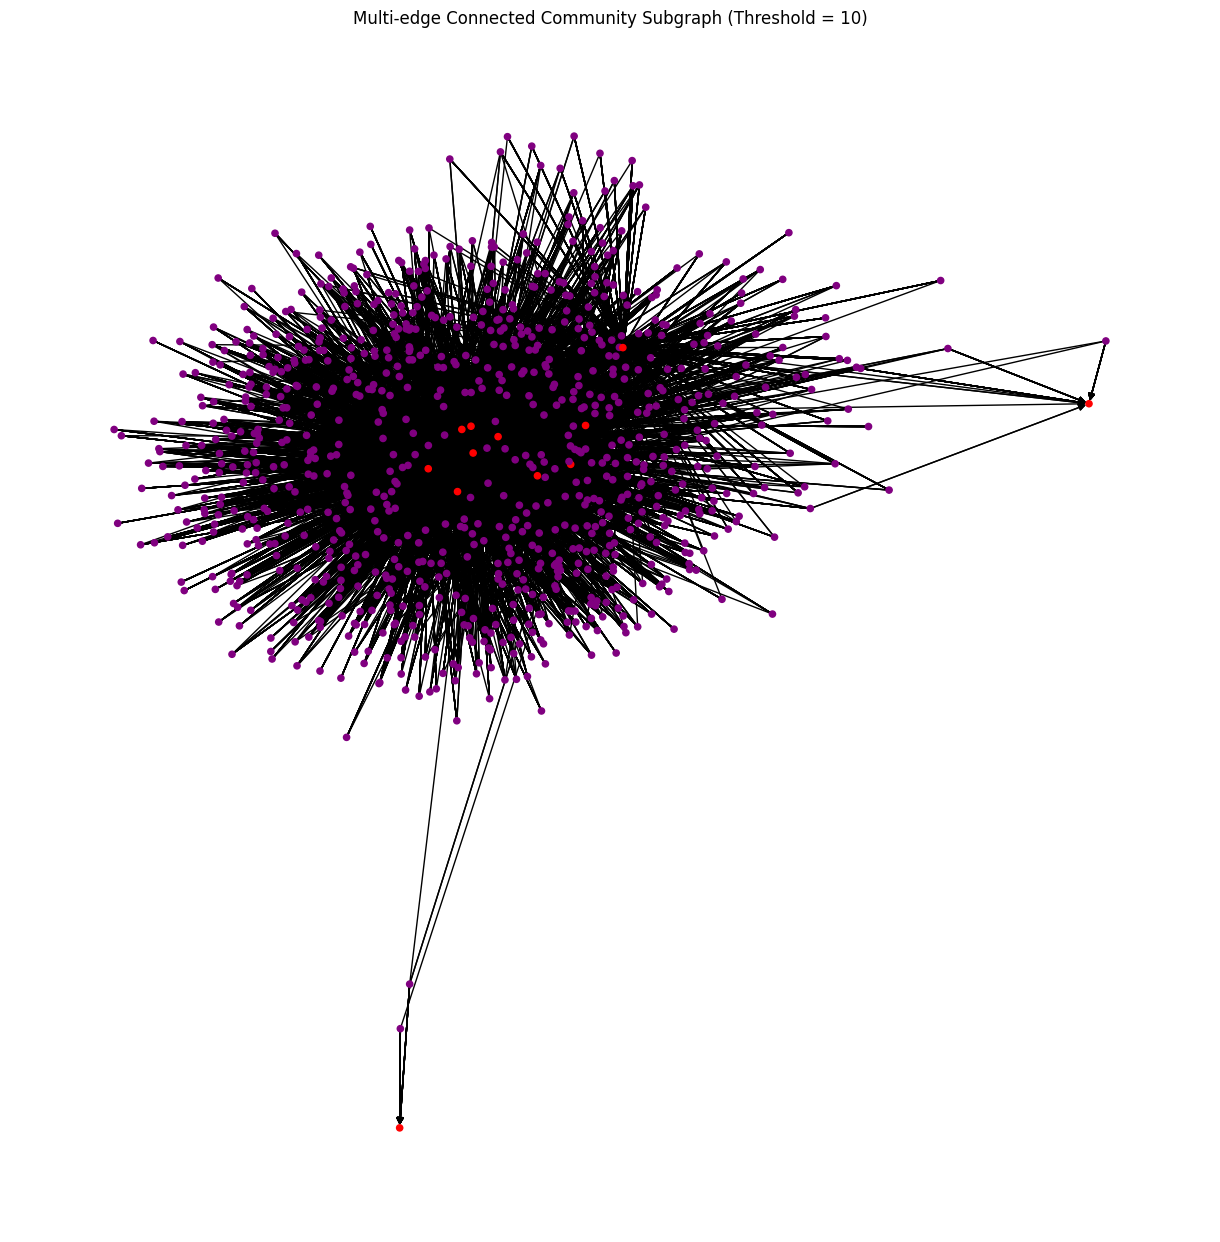

In [14]:
# Let's set our edge multiplicity threshold to 10 for defining multi-edge connected communities
threshold = 10

from tqdm import tqdm

def get_multiedge_connected_nodes(graph, target_node, neighbors: list, threshold: int = 2) -> list:
    nodes = []
    for neighbor in neighbors:
        if graph.number_of_edges(target_node, neighbor) >= threshold:
            nodes.append(neighbor)
    return nodes

def find_multiedge_communities(graph, threshold: int = 2) -> list:
    community_nodes = set()
    for node in tqdm(graph.nodes(), desc="Finding multi-edge connected communities"):
        neighbors = list(graph.neighbors(node))
        multiedge_neighbors = get_multiedge_connected_nodes(graph, node, neighbors, threshold)
        if multiedge_neighbors:  # Only add if this node has multi-edge connections
            community_nodes.add(node)  # Add the target node itself
            community_nodes.update(multiedge_neighbors)  # Add its multi-edge neighbors
    return list(community_nodes)

multi_edge_community_nodes = find_multiedge_communities(G, threshold=threshold)
G_multi_edge_community = G.subgraph(multi_edge_community_nodes).copy()
print(f"Original graph: {G}")
print(f"Multi-edge community subgraph: {G_multi_edge_community}")
print(f"Number of nodes with multi-edges: {len(multi_edge_community_nodes)}")
print(f"Density: {nx.density(G_multi_edge_community)}")

print("Generating Plot...")
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_multi_edge_community, seed=42)  # positions for all nodes
nx.draw(G_multi_edge_community, pos, with_labels=False, node_size=20, font_size=8, node_color=[node_color(n) for n in G_multi_edge_community.nodes()])
plt.title(f"Multi-edge Connected Community Subgraph (Threshold = {threshold})")
plt.show()

**This is a rather interesting community of sequences with multiple activations of the same feature. If we perform egocentric graph analysis, we might find something interesting about these sequences or features.**

In [15]:
# identify features
nodes = [n for n in G_multi_edge_community.nodes() if isinstance(n, int)]
print(f"Number of feature nodes in multi-edge community: {len(nodes)}")
print(nodes)

# compile token set across edges to see if there is any commonality
tokens = dict()
for u, v, data in G_multi_edge_community.edges(data="token"):
    t = tokens.get(data)
    if t is None:
        tokens[data] = 1
    else:
        tokens[data] += 1

print(f"Number of unique tokens in multi-edge community: {len(tokens)}")
sorted_tokens = sorted(tokens.items(), key=lambda item: item[1], reverse=True)
print("Top 25 Tokens by Frequency in Multi-edge Community:")
for token, count in sorted_tokens[:25]:
    print(f"Token: {token}, Count: {count}")

Number of feature nodes in multi-edge community: 12
[6296, 6445, 407, 2558, 4793, 835, 5234, 3378, 7612, 7799, 7949, 1867]
Number of unique tokens in multi-edge community: 3089
Top 25 Tokens by Frequency in Multi-edge Community:
Token: C, Count: 688
Token: G, Count: 640
Token: T, Count: 471
Token: A, Count: 394
Token: CCCGCC, Count: 44
Token: CCGCCG, Count: 42
Token: GCCGCC, Count: 42
Token: CGCCGC, Count: 38
Token: CCCTCC, Count: 38
Token: GCCGCG, Count: 37
Token: CCTTCC, Count: 37
Token: CCCGCG, Count: 34
Token: CGCCCC, Count: 33
Token: CGGCGG, Count: 32
Token: CGCGGC, Count: 31
Token: GCCCGC, Count: 31
Token: CGGCGC, Count: 31
Token: CCCGGC, Count: 30
Token: GGCGGC, Count: 30
Token: CCGCGG, Count: 30
Token: CGGCCG, Count: 30
Token: GCGCCC, Count: 29
Token: GCCGGC, Count: 29
Token: CCCCGC, Count: 29
Token: GCCCCG, Count: 29


In [16]:
# look for common gene annotations among sequences in this community
sequence_nodes = [n for n in G_multi_edge_community.nodes(data=True) if isinstance(n[0], str)]
print(f"Number of sequence nodes in multi-edge community: {len(sequence_nodes)}")

# check for struct of annotations
sequence_nodes[2]


Number of sequence nodes in multi-edge community: 893


('chr1:200620397-200620497(-)',
 {'type': 'sequence',
  'chrom': 'chr1',
  'start': 200620397,
  'end': 200620497,
  'strand': '-',
  'annotations': {}})

In [17]:
# extract annotations, categorize, and count
genes = {}
types = {}
for seq_node, data in sequence_nodes:
    annot = data.get("annotations")
    if annot and len(annot) > 0:
        for name,f in annot.items():
            ftype = f.get("featuretype")
            gene = f.get("gene_name")
            if gene:
                g = genes.get(gene)
                if g is None:
                    genes[gene] = 1
                else:
                    genes[gene] += 1
            if ftype:
                t = types.get(ftype)
                if t is None:
                    types[ftype] = 1
                else:
                    types[ftype] += 1

print(f"Top 20/{len(genes)} Genes in Multi-edge Community:")
for i in [(k,v) for k,v in sorted(genes.items(), key=lambda item: item[1], reverse=True)[:20]]:
    print(i)
print(f"Top 20/{len(types)} Feature Types in Multi-edge Community:")
for i in [(k,v) for k,v in sorted(types.items(), key=lambda item: item[1], reverse=True)[:20]]:
    print(i)

Top 20/128 Genes in Multi-edge Community:
('MAP4', 326)
('KLC1', 64)
('MBNL3', 34)
('OSBPL3', 33)
('PARP9', 32)
('HNRNPA2B1', 28)
('LARP4B', 24)
('CASK', 21)
('CEP250', 21)
('MTA1', 18)
('PPP4R3B', 17)
('RAPGEF1', 14)
('ANP32E', 14)
('WARS1', 12)
('RPRD2', 12)
('GPI', 10)
('STK3', 10)
('KIF13A', 10)
('CEP78', 9)
('PHKA2', 8)
Top 20/8 Feature Types in Multi-edge Community:
('start_codon', 626)
('5UTR', 258)
('CDS', 73)
('exon', 23)
('stop_codon', 22)
('3UTR', 2)
('transcript', 1)
('gene', 1)


# Other Networks with Potential Biological Relevance
**Let's also try something with some biological relevance and look for GC-rich tokens in the edges and create a subgraph based on that. Considering the results above, we'll likely find some overlap as well.**

In [18]:
GC = nx.MultiGraph()
for u, v, data in tqdm(G.edges(data=True), desc="Building GC-rich subgraph"):
    token = data.get("token")
    if token and all(base in 'GC' for base in token):
        GC.add_edge(u, v, **data)
    else:
        continue

# add in node attributes from original graph
for n, attrs in G.nodes(data=True):
    if n in GC:
        GC.nodes[n].update(attrs)

print(f"GC-rich subgraph: {GC}")
# density
density = nx.density(GC)
print(f"Density: {density}")

Building GC-rich subgraph: 100%|██████████| 218218/218218 [00:00<00:00, 1040777.96it/s]

GC-rich subgraph: MultiGraph with 11490 nodes and 29234 edges
Density: 0.00044291050409514955


In [19]:
# The graph is still quite large; let's extract the k-core
k = 5
GC_core = nx.Graph(GC.to_undirected())  # convert to simple graph
GC_core = nx.k_core(GC_core, k=k)
print(GC_core)

Graph with 428 nodes and 1971 edges


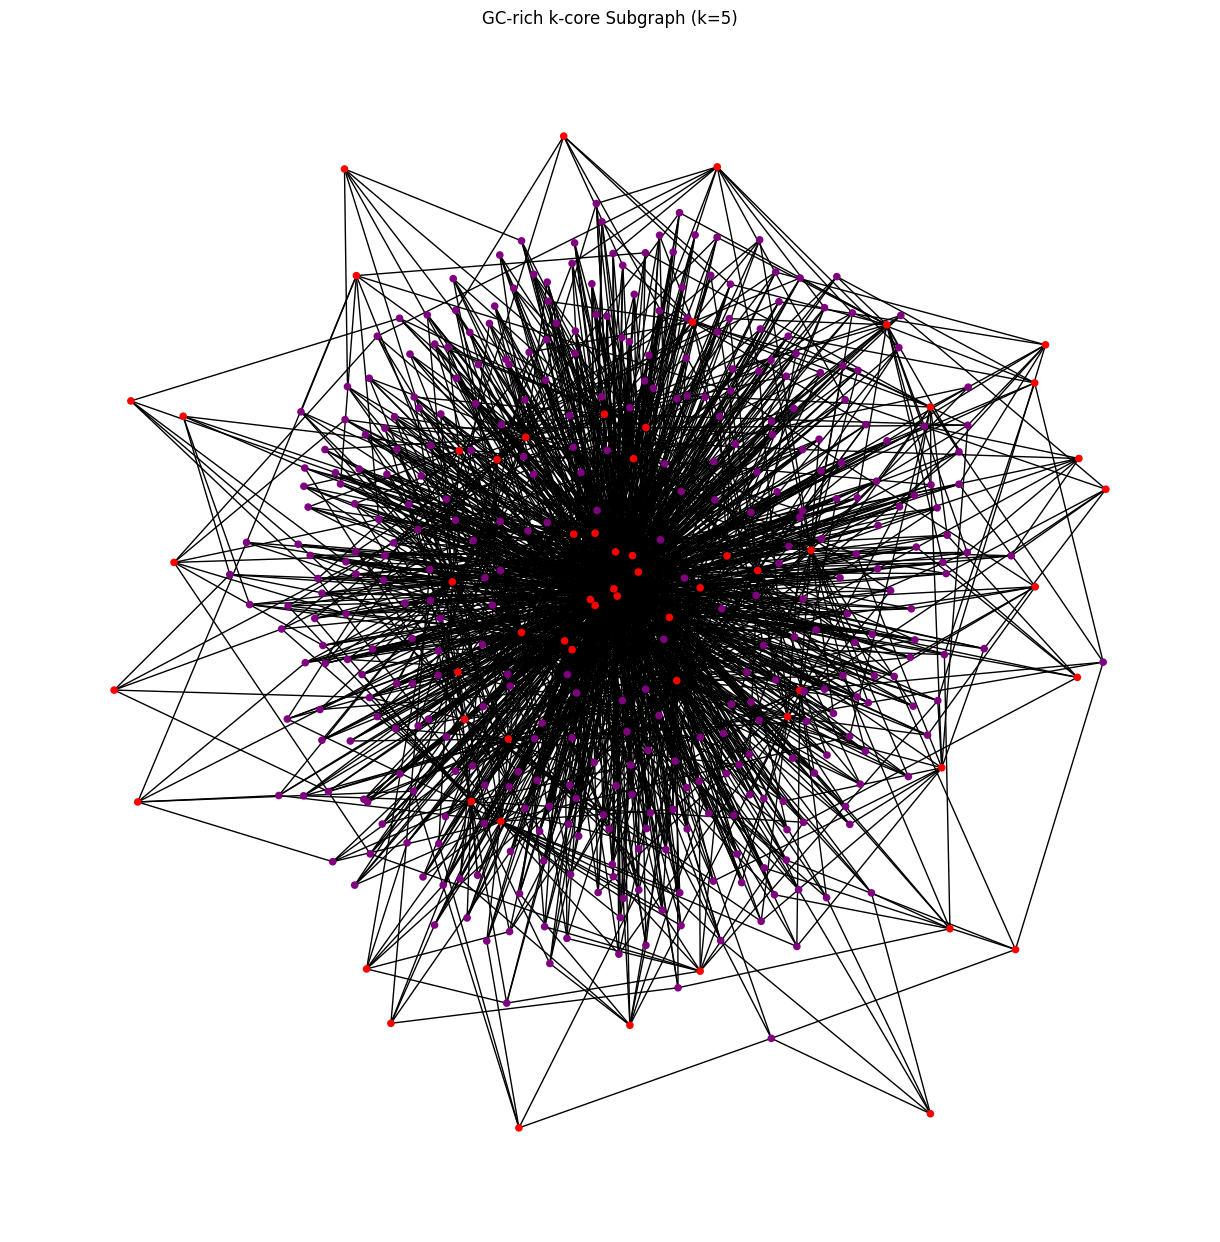

In [20]:
# lets try to visualize
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(GC_core, seed=42)  # positions for all nodes
nx.draw(GC_core, pos, with_labels=False, node_size=20, font_size=8, node_color=[node_color(n) for n in GC_core.nodes()])
plt.title(f"GC-rich k-core Subgraph (k={k})")
plt.show()

### Other Random Visualizations

Feature: 7244
Local Graph: MultiDiGraph with 18 nodes and 17 edges


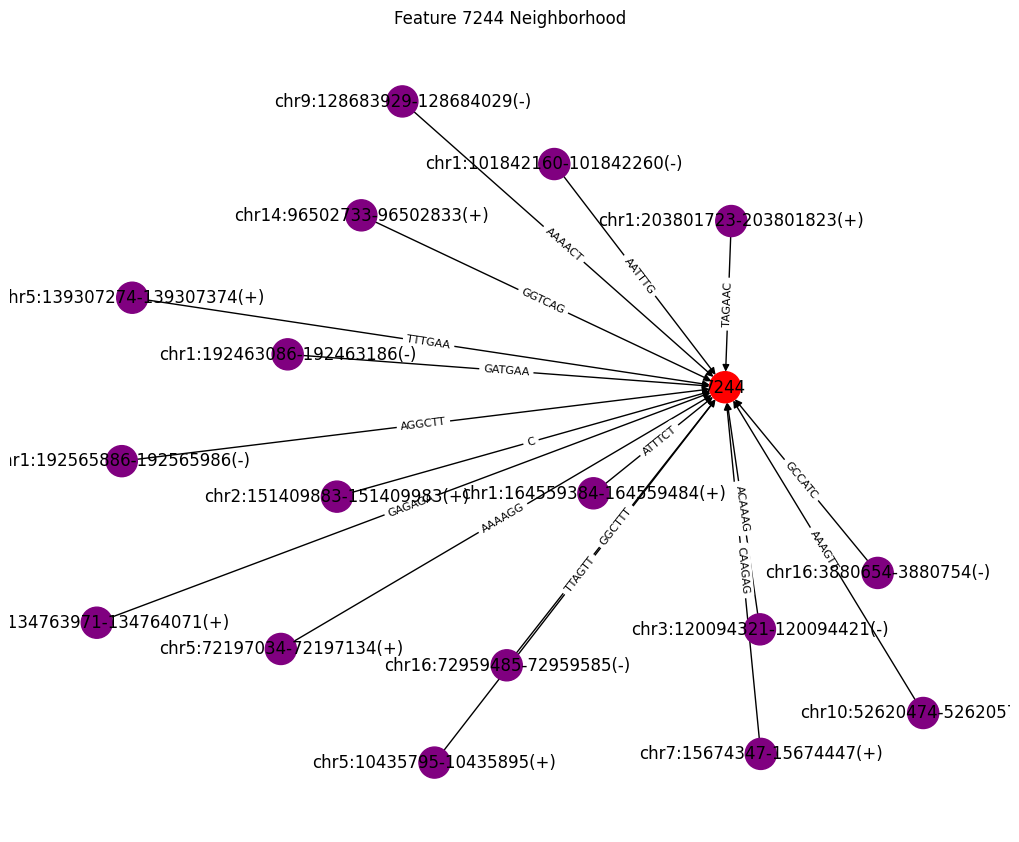

In [22]:
with open("data/refined_cisplt_bind.json") as f:
    data = json.load(f)

example = [node for node in G.nodes() if type(node) == int][101]
print(f"Feature: {example}")

# Get sequences that connect to this feature (predecessors in directed graph)
neighbors = list(G.predecessors(example))
subgraph_nodes = neighbors + [example]
e_graph = G.subgraph(subgraph_nodes)
print("Local Graph:", e_graph)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(e_graph, seed=72)
node_colors = [node_color(n) for n in e_graph.nodes()]

nx.draw(e_graph, pos, with_labels=True, node_color=node_colors, node_size=500)

# Add token labels on edges
edge_labels = {(u,v): data['token'] for u,v,data in e_graph.edges(data=True) if 'token' in data}
nx.draw_networkx_edge_labels(e_graph, pos, edge_labels, font_size=8)

plt.title(f"Feature {example} Neighborhood")
plt.show()